In [1]:
!pip install optionlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.7/922.7 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: holidays
    Found existing installation: holidays 0.73
    Uninstalling holidays-0.73:
      Successfully uninstalled holidays-0.73
  Attempting uninstall: 

In [14]:
# Cell 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# For clean visuals
sns.set(style="whitegrid")

In [15]:
# Cell 2: Black-Scholes Formula
def black_scholes_call(S, K, T, r, sigma):
    """ S: stock price, K: strike price, T: time to maturity (in years), r: risk-free rate, sigma: volatility """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


In [16]:
# Cell 3: Parameters & Simulation
S = 100       # Current stock price
K = 100       # Strike price
T = 0.5       # Time to maturity (6 months)
r = 0.05      # Risk-free rate

# Varying volatility from 10% to 100%
volatilities = np.linspace(0.1, 1.0, 100)
premiums = [black_scholes_call(S, K, T, r, sigma) for sigma in volatilities]

df = pd.DataFrame({
    "Implied Volatility": volatilities,
    "Option Premium": premiums
})

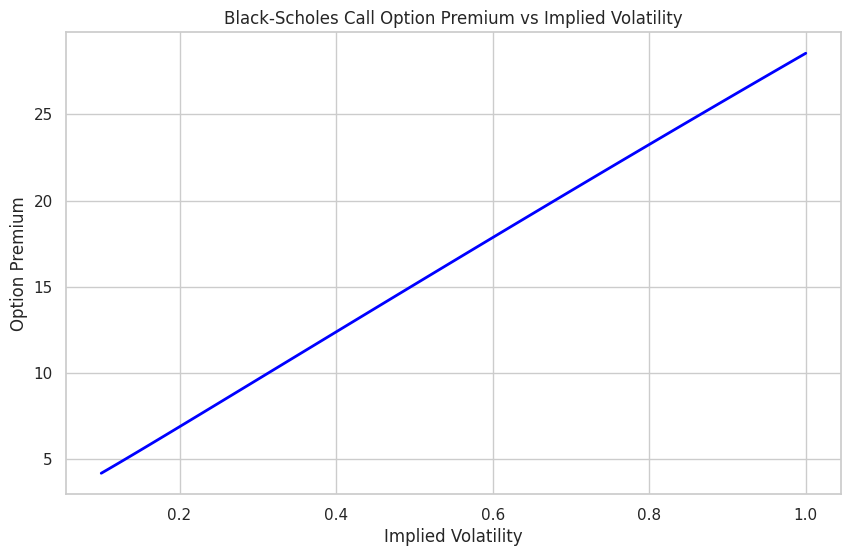

In [17]:
# Cell 4: Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x="Implied Volatility", y="Option Premium", data=df, color="blue", linewidth=2)
plt.title("Black-Scholes Call Option Premium vs Implied Volatility")
plt.xlabel("Implied Volatility")
plt.ylabel("Option Premium")
plt.grid(True)
plt.show()

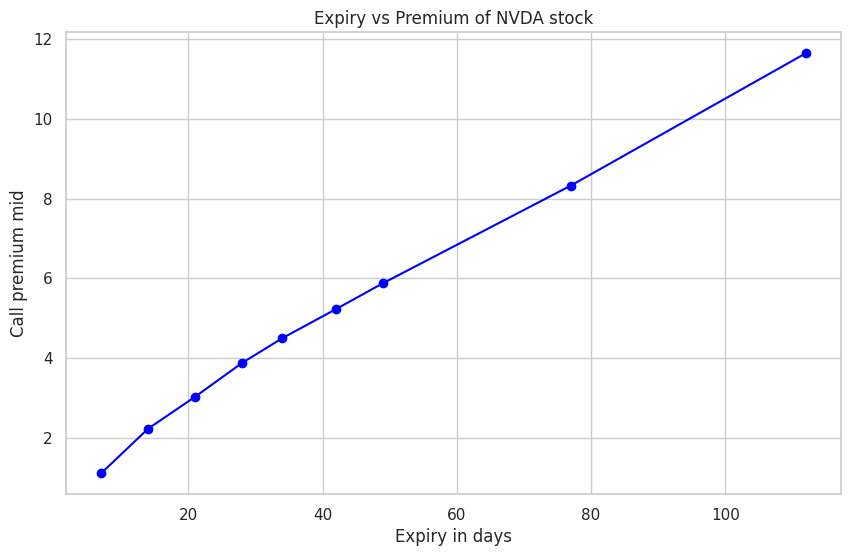

In [19]:
# Given data points
data = [[7,1.11], [14, 2.23], [21, 3.03], [28, 3.88], [34, 4.5], [42, 5.23], [49, 5.88], [77, 8.33], [112, 11.65]]

# Separate into X and Y lists
x_vals, y_vals = zip(*data)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue')
plt.title("Expiry vs Premium of NVDA stock")
plt.xlabel("Expiry in days")
plt.ylabel("Call premium mid")
plt.grid(True)
plt.show()